#Using Convolutional Neural Networks to clasify handwritten digits from 0-9

In [ ]:
# Description: using CNN to clasify handwritten digits from 0-9

In [3]:
#importing the necessary libraries 

from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist 
#from keras.utils import to_categorical 
#moved to:
from tensorflow.keras.utils import to_categorical #later used to One-Hot 
#y/output data Encoding 
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Loading and then splitting the available data to training set and testing set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)
5


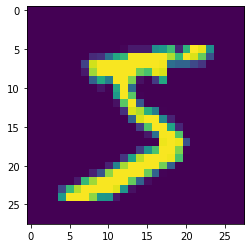

In [9]:
#images are present in the x_train/x_shape
print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[0])
print (y_train[0])


  


*   Loading the model







*   Reshaping the data to fit the model
60000 rows, 28x28 pixels and depth of 1, which is the greyscale.
*   Data is also split into:

1.   training input set x_train and the corresponding output set y_train
2.   testing input set x_test and the corresponding output set y_test






In [13]:
#Reshaping the data to fit the model
#60000 rows, 28x28 pixels and depth of 1, which is the greyscale
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

#for the y_test/train we encode the data using One-Hot Encoding technique 
y_train_one_hot = to_categorical (y_train)
y_test_one_hot = to_categorical (y_test)

print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]




*   We set 2 convolutional layers with a 3x3 kernel, and the activation is the rectified linear function
*   Then to get a one dimentional array we flatten our data
*    And lastly, adding a Dense layer with 10 neurons and probability distribution activation function, i.e. Softmax 
  








=

In [15]:
#Building the CNN model
model = Sequential()
#addind model layers:
#1st the convolutional layer taking an input, with 64 channels
#3x3 kernel, and the activation is rectified linear
model.add(Conv2D(64, 
                 kernel_size =3, 
                 activation = 'relu',
                 input_shape = (28, 28, 1)))
model.add(Conv2D(32, 
                 kernel_size =3, 
                 activation = 'relu'))
#flattening the arrays into a one dimentional array:
model.add(Flatten())
#at the output we have 10 outputs, we will use the softmax for probability
#distribution, because you don't need an activation at the last layer
model.add(Dense(10, activation = 'softmax'))








*   The model is now compiled
*   the default ADAM optimizer is used, the learning rate associated with ADAM is 0.001, which then decays step-wise resulting in an appropriate convergence to the minumum of the error function
*   and for the loss function the cross_categoricalentropy is used because the classifications output is > 2, i.e. non-binary

   





In [16]:
#we now compile the model
#the default ADAM optimizer is used, the learning rate associated with ADAM
#is 0.001, which then decays step-wise resulting in an appropriate 
#convergence to the minumum of the error function
#and for the loss function the 
#cross_categoricalentropy is used because the classifications output
#is > 2, i.e. non-binary
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])



*   Fitting the model and storing it in the variable 'history'



In [18]:
#training the model
history = model.fit(x_train, y_train_one_hot,
                    validation_data = (x_test, y_test_one_hot), 
                    epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 185s 91ms/step - loss: 0.7390 - accuracy: 0.9134 - val_loss: 0.0977 - val_accuracy: 0.9704
Epoch 2/3
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0636 - val_accuracy: 0.9810
Epoch 3/3
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0767 - val_accuracy: 0.9800


############## NOTES AND Remarks##################



*   THE LOSS CURVE INDICATED THAT THE MODEL IS DOING GOOD ON THE TRAININD DATA BUT NOT SO MUCH ON THE VALIDATION DATA, BECAUSE OF THE BEHAVIOUR AND IT SPLITS AND DIVERGES. THIS INDICATED THAT THE MODEL IS OVERFITTING
*   -WE COULD STOP AT 2 EPOCHS AND THE MODEL WOULD BE GOOD OR MAYBE INCREASE THE NUMBER OF EPOCHS TO SEE IF THERE EXISTS A CONVERGENCE BEHAVIOUR AFTER THE 3rd, 4th ... etc. epochs.


THIS CAN BE FIXED BY:


1.   CHANGING THE NUMBER OF NEURONS/DEPTH OF LAYERS
2.   ADDING A DROP OUT
1.  SPLITTING THE DATA DIFFENTLY SO THAT IT IS MORE DIVERSE/REPRESENTATIVE









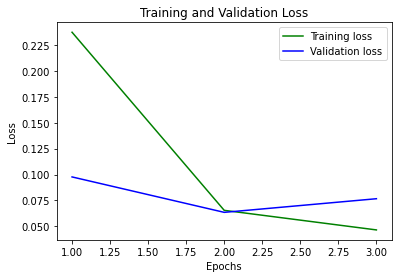

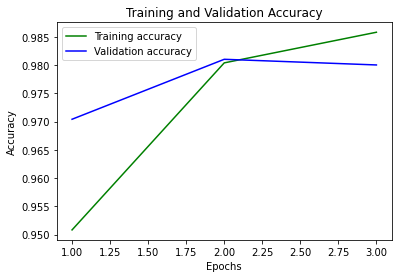

In [19]:
#Drawing the loss and accuracy curves

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range (1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'g', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##############NOTES AND FINDINGS##################

## THE LOSS CURVE INDICATED THAT THE MODEL IS DOING GOOD ON THE TRAININD DATA
## BUT NOT SO MUCH ON THE VALIDATION DATA, BECAUSE OF THE BEHAVIOUR AND IT 
## SPLITS AND DIVERGES. THIS INDICATED THAT THE MODEL IS OVERFITTING

## WE COULD STOP AT 2 EPOCHS AND THE MODEL WOULD BE GOOD
## OR MAYBE INCREASE THE NUMBER OF EPOCHS TO SEE IF THERE EXISTS A CONVERGENCE
## BEHAVIOUR AFTER THE 3rd, 4th ... etc. epochs.

## THIS CAN BE FIXED BY:
## 1__CHANGING THE NUMBER OF NEURONS/DEPTH OF LAYERS
## 2__ADDING A DROP OUT
## 3__SPLITTING THE DATA DIFFENTLY SO THAT IT IS MORE DIVERSE/REPRESENTATIVE